## NLP in TTS

### 1. RNN (Recurrent Neural Networks)

**What are Dynamical Systems?**

I know the state of the system now at time t.What will be the state at time t+n?

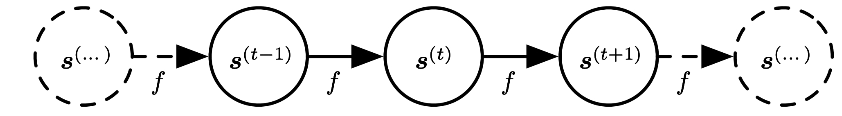

**Back Propagation Through Time(BPTT) Problem**:speed,storage

Equal sized input and output sequence

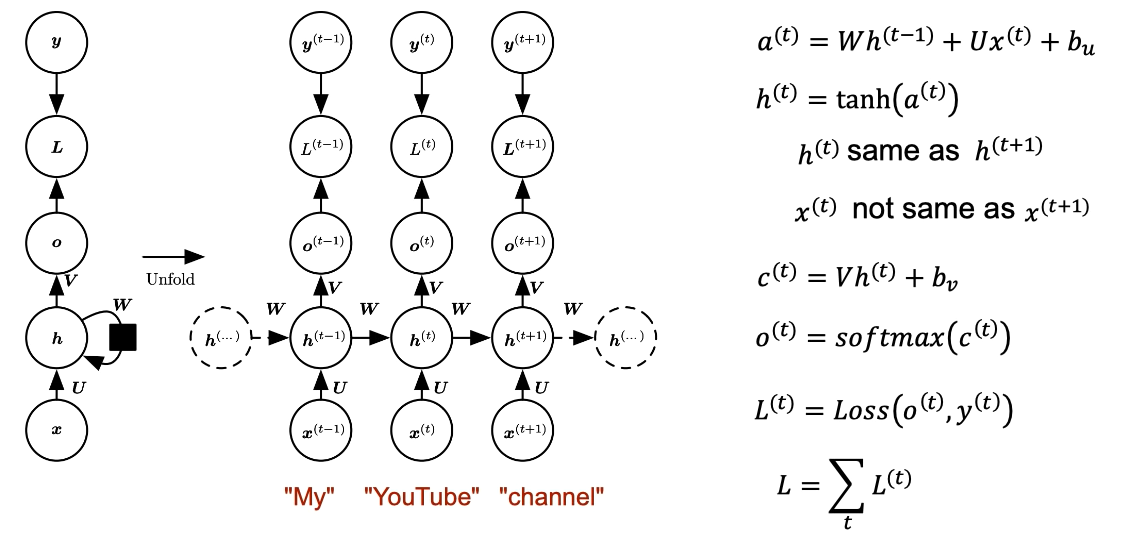

There's a problem with back propagation through time at every time step we need to perform back propagation so deep layers have significantly larger computation costs they take longer and activations need to be stored at every time step so the amount of storage you need. During training time instead of feeding the hidden layer of the previous state to the hidden layer of the next state we feed the output Y the actual label Y from the previous state to the Hidden layer of the next state.

### 2. LSTM

**Isn't Vanish/Exploding gradient a problem in DNN too?**

Much worse in RNN than DNN

**How deal with this in RNN? lstm**

LSTM是特殊的RNN,主要为了解决长序列训练过程中梯度消失和梯度爆炸问题。简单来说，相比普通的RNN，LSTM能够在更长的序列中有更好的表现。

左图为普通RNN，右图为LSTM

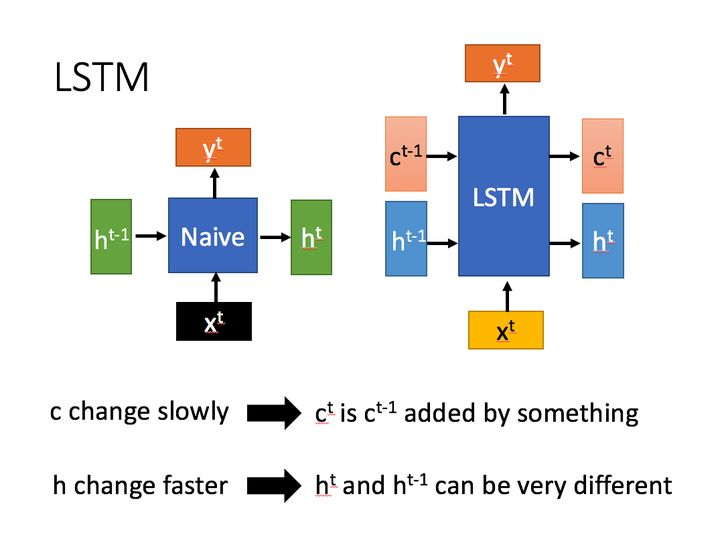

相比于RNN只有一个传递状态$h^t$,LSTM有两个传输状态，一个为$c^t$(cell state),和一个$h^t$(hidden state).(Tips:RNN中的$h^t$对应于LSTM中的$c^t$)

其中对于传递下去的$c^t$改变的很慢，通常输出的$c^t$是上一个状态传过来的$c^{t-1}$加上一些数值。而$h^t$则在不同点上往往有很大的区别。

#### 深入LSTM结构

首先使用LSTM的当前输入$x^t$和上一个状态传递下来的$h^{t-1}$拼接训练得到四个状态。

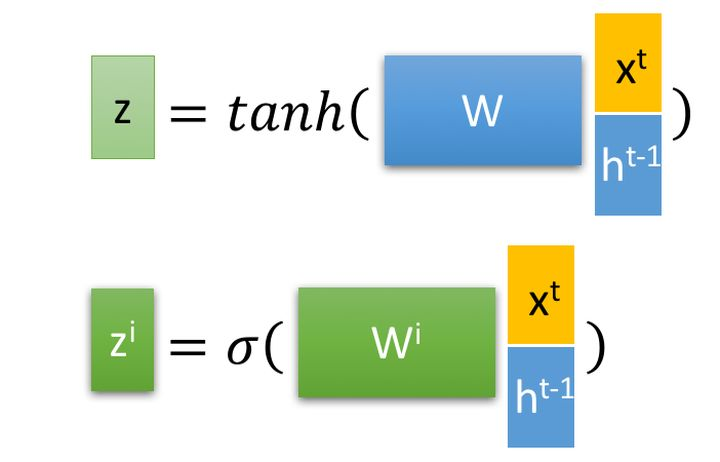
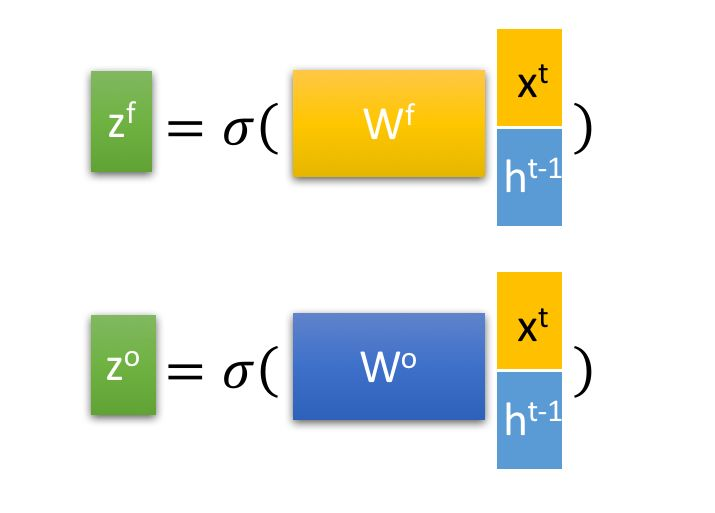

其中，$z^f,z^i,z^o$是有拼接向量乘以权重矩阵之后，再通过一个sigmoid激活函数转换为0-1之间的数值，来作为一种门控状态。而$z$则是将结果通过一个$tanh$激活函数转换为-1到1之间的值（这里使用tanh是因为这里是将其作为输入数据，而不是门控信号）。

**下面进一步介绍这四个状态在LSTM内部的使用**

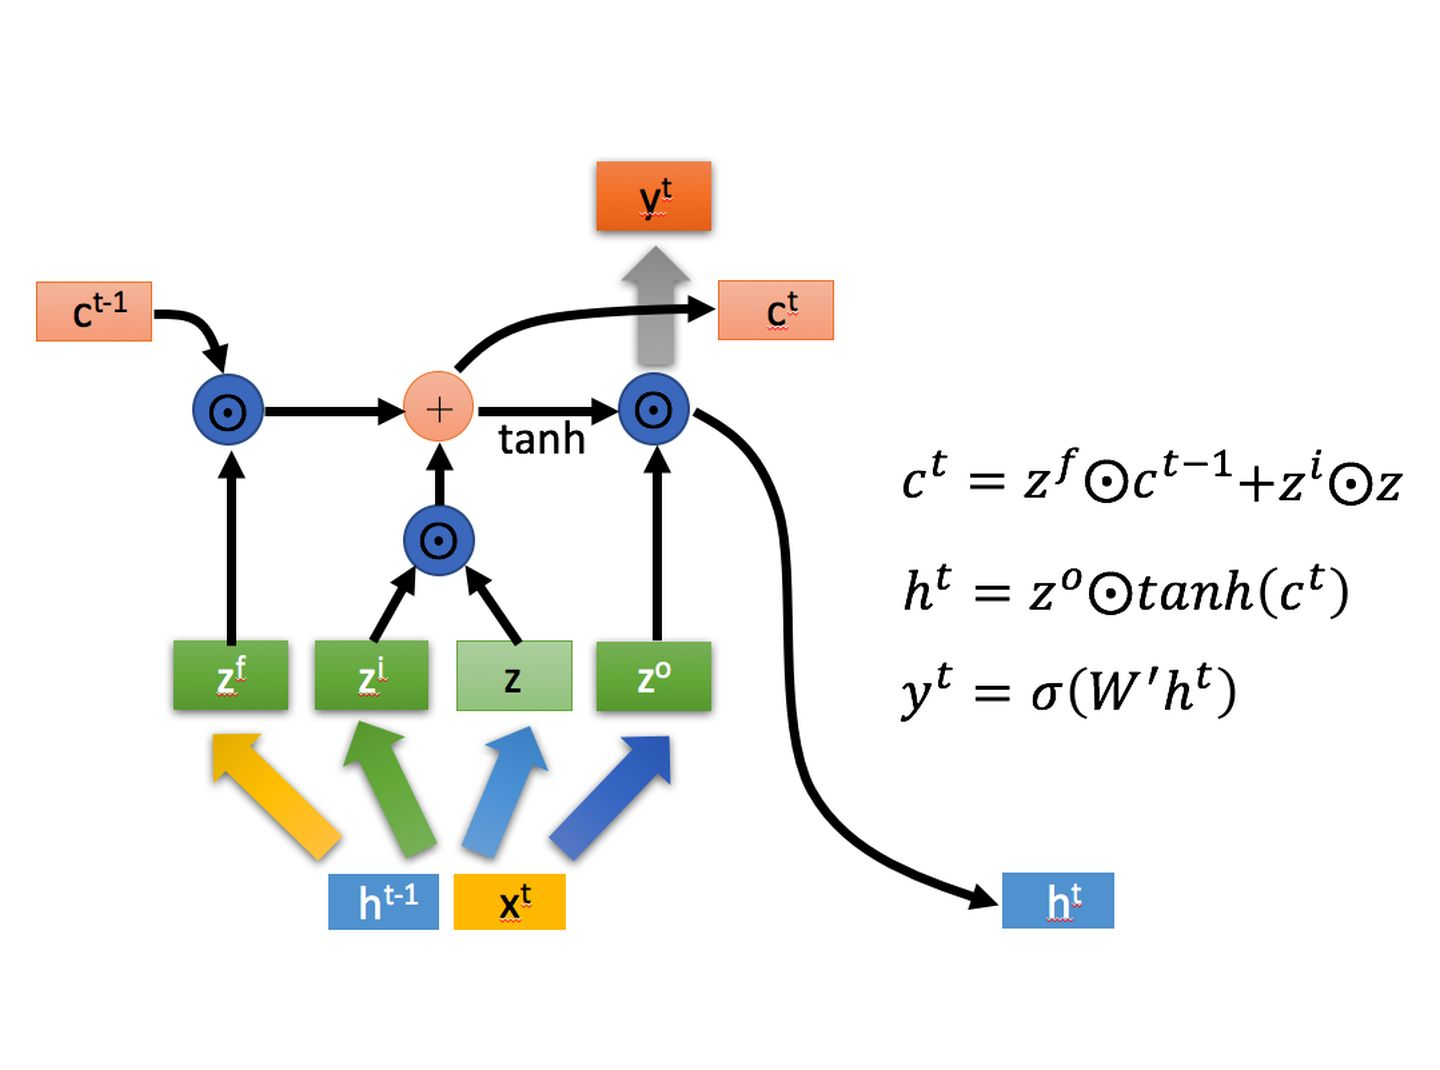

$\otimes$是Hadamard Product，也就是操作矩阵中对应的元素相乘，因此要求两个相乘矩阵是同型的。 $\oplus$ 则代表进行矩阵加法

**LSTM内部主要有三个阶段：**

1. **忘记阶段**。这个阶段主要是对上一个节点传进来的输入进行选择性忘记。简单来说就是会 “忘记不重要的，记住重要的”。

具体来说是通过计算得到的 $z^f$（f表示forget）来作为忘记门控，来控制上一个状态的 $c^{t-1}$ 哪些需要留哪些需要忘。

2. **选择记忆阶段**。这个阶段将这个阶段的输入有选择性地进行“记忆”。主要是会对输入$x^t$ 进行选择记忆。哪些重要则着重记录下来，哪些不重要，则少记一些。当前的输入内容由前面计算得到的$z$表示。而选择的门控信号则是由$z^i$（i代表information）来进行控制。

Note:将上面两步得到的结果相加，即可得到传输给下一个状态的$c^t$。也就是上图中的第一个公式。

3. 输出阶段。这个阶段将决定哪些将会被当成当前状态的输出。主要是通过 $z^o$ 来进行控制的。并且还对上一阶段得到的$c^o$ 进行了放缩（通过一个tanh激活函数进行变化）。

与普通RNN类似，输出 $y^t$ 往往最终也是通过 $h^t$ 变化得到。

#### Summary

以上，就是LSTM的内部结构。通过门控状态来控制传输状态，记住需要长时间记忆的，忘记不重要的信息；而不像普通的RNN那样只能够“呆萌”地仅有一种记忆叠加方式。对很多需要“长期记忆”的任务来说，尤其好用。

但也因为引入了很多内容，导致**参数变多**，也使得**训练难度加大**了很多。因此很多时候我们往往会使用效果和LSTM相当但参数更少的**GRU**来构建大训练量的模型。

### 3. GRU

#### 什么是GRU

GRU（Gate Recurrent Unit）是循环神经网络（Recurrent Neural Network, RNN）的一种。和LSTM（Long-Short Term Memory）一样，也是为了解决长期记忆和反向传播中的梯度等问题而提出来的。

GRU和LSTM在很多情况下实际表现上相差无几，那么为什么我们要使用新人GRU（2014年提出）而不是相对经受了更多考验的LSTM（1997提出）呢。

下图1-1引用论文中的一段话来说明GRU的优势所在。

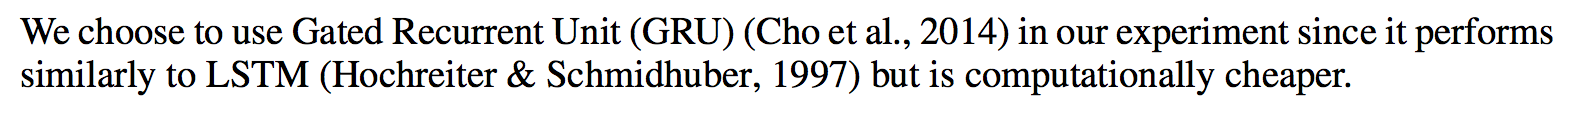
相比LSTM，使用GRU能够达到相当的效果，并且相比之下更容易进行训练，能够很大程度上提高训练效率，因此很多时候会更倾向于使用GRU。

OK，那么为什么说GRU更容易进行训练呢，下面开始介绍一下GRU的内部结构。

#### GRU浅析

GRU的输入输出结构与普通的RNN是一样的。有一个当前的输入$x^t$,和上一个节点传递下来的hidden state $h^{t-1}$,这个hidden state包含了之前节点的相关信息。

结合$x^t$和$h^{t-1}$,GRU会得到当前隐藏节点的输出$y^t$和传递给下一个节点的隐状态$h^t$。        
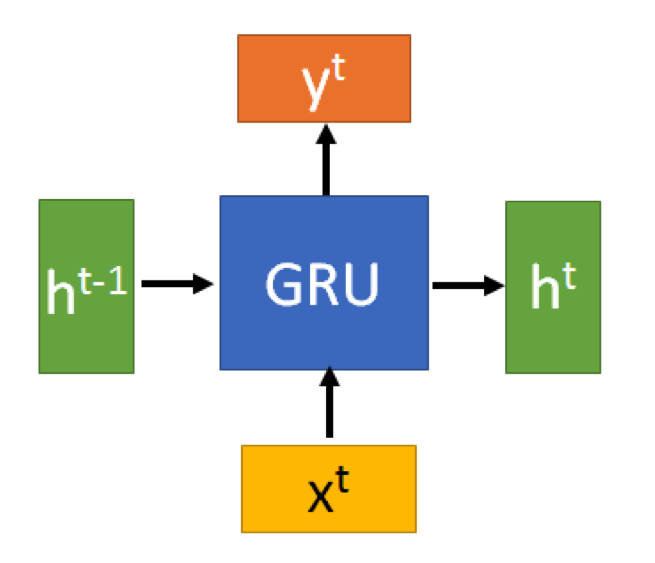      
首先，我们先通过上一个传输下来的状态$h^{t-1}$和当前节点的输入$x^t$来获取两个门控状态。如下图所示，首先r控制重置的门控(reset gate),z为控制更新的门控(update gate)。

Tips:$\sigma$为sigmoid函数，通过这个函数可以将数据变换为0-1范围内的数值，从而来充当门控信号。      
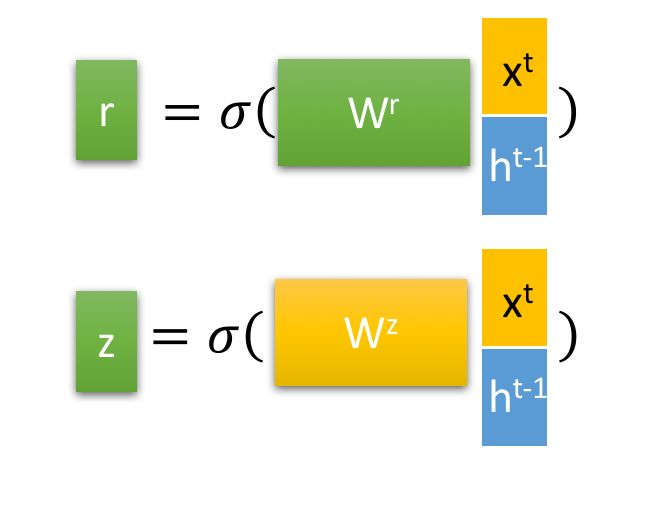

与LSTM分明的层次结构不同，GRU中得到门控信号之后，首先使用重置门控来得到"重置"之后的数据$h^{t-1'}=h^{t-1}\odot r$,再将$h^{t-1'}$与输入$x^t$拼接，再通过tanh激活函数来将数据缩放到-1到1的范围内。如下图：  
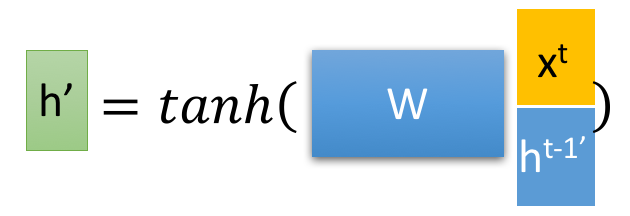     
这里的$h'$ 主要是包含了当前输入的$x^t$数据。有针对性地对$h'$添加到当前的隐藏状态，相当于”记忆了当前时刻的状态“。类似于LSTM的选择记忆阶段。   
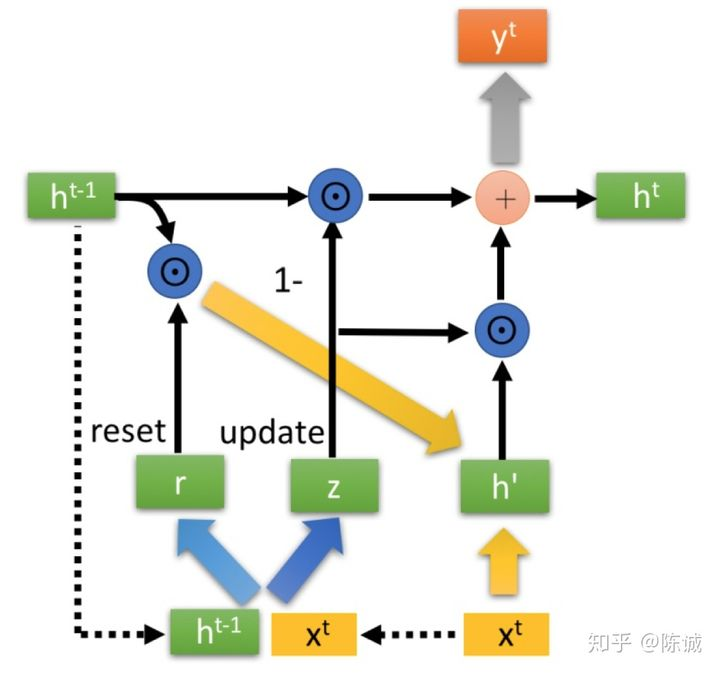   

$\odot$是Hadamard Product

最后介绍GRU最关键的一个步骤，我们可以称之为”更新记忆“阶段。

在这个阶段，我们同时进行了遗忘和记忆两个步骤。我们使用了先前得到的更新门控z（update gate）

**更新表达式：** $h^t=(1-z)\odot h^{t-1} + z\odot h'$ 

首先再次强调一下，门控信号（这里的$z$）的范围为0~1。门控信号越接近1，代表”记忆“下来的数据越多；而越接近0则代表”遗忘“的越多。

GRU很聪明的一点就在于，我们使用了同一个门控$z$就同时可以进行遗忘和选择记忆（LSTM则要使用多个门控）。

- $(1-z)\odot h^{t-1}$：表示对原本隐藏状态的选择性“遗忘”。这里的$1-z$可以想象成遗忘门（forget gate），忘记$h^{t-1}$维度中一些不重要的信息。

- $z\odot h'$ ： 表示对包含当前节点信息的$h'$进行选择性”记忆“。与上面类似，这里的$(1-z)$ 同理会忘记$h'$维度中的一些不重要的信息。或者，这里我们更应当看做是对$h'$维度中的某些信息进行选择。

- $h^t=(1-z)\odot h^{t-1}+z\odot h'$ ：结合上述，这一步的操作就是忘记传递下来的$h^{t-1}$中的某些维度信息，并加入当前节点输入的某些维度信息。

Tips:可以看到，这里的遗忘$z$和选择$(1-z)$是联动的。也就是说，对于传递进来的维度信息，我们会进行选择性遗忘，则遗忘了多少权重($z$)，我们就会使用包含当前输入的$h'$中所对应的权重进行弥补$(1-z)$。以保持一种”恒定“状态。

#### LSTM和GRU的关系

GRU中的$h'$实际上可以看成对应于LSTM中的hidden state;上一个节点传下来的$h^{t-1}$则对应于LSTM的cell state.$1-z$对应的则是LSTM中的$z^f$forget gate,那么$z$我们似乎可以看成是选择门$z^i$.

#### Summary

GRU输入输出的结构与普通的RNN相似，其中的内部思想与LSTM相似。

与LSTM相比，GRU内部少了一个”门控“，参数比LSTM少，但是却也能够达到与LSTM相当的功能。考虑到硬件的计算能力和时间成本，因而很多时候我们也就会选择更加”实用“的GRU啦。